# Conditional Variational Autoencoder (CVAE)

## Import statements + Device

In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from utils import print_np_array_properties, imshow_batch, imshow_with_encoded_labels
from tqdm.notebook import tqdm, trange
import warnings
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Available Device: {device}')

Available Device: cuda


## Dataset

### Download Dataset

In [2]:
## Define preprocessing transformation applied to data
transform = transforms.Compose([
    transforms.ToTensor()
    ])

train_data = datasets.CelebA(
    root='data',
    split='train',
    download=True,
    transform=transform)

valid_data = datasets.CelebA( 
    root='data',
    split='valid',
    download=True,
    transform=transform)

test_data = datasets.CelebA( 
    root='data',
    split='test',
    download=True,
    transform=transform)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


### Prep data

torch.Size([64, 3, 218, 178])


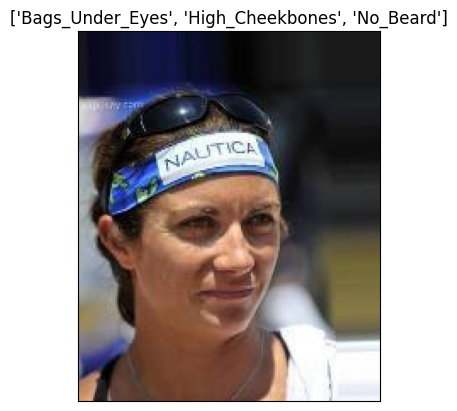

In [6]:
num_workers = 0
# how many samples per batch to load
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

classes = ['5_o_Clock_Shadow','Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes','Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
        'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
        'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)


imshow_with_encoded_labels(1, images, labels, classes)

    
    